## Table of Contents
### Part 1 - Healthcare Data Analysis
- [1-1: Initial Analysis of Reference Dataset](#1---1:-Initial-Analysis-of-Reference-Dataset)
- [1-2: Distribution Analysis of Reference Dataset](#1---2:-Distribution-Analysis-of-Reference-Dataset)
  - [1-2.1: Numerical Variables Analysis](#1---2.1:-Numerical-Variables-Analysis)
  - [1-2.2: Categorical Variables Analysis](#1---2.2:-Categorical-Variables-Analysis)
  - [1-2.3: Date Fields Analysis](#1---2.3:-Date-Fields-Analysis)
  - [1-2.4: Relationships Between Variables](#1---2.4:-Relationships-Between-Variables)
  - [1-2.5: Key Conditional Probabilities](#1---2.5:-Key-Conditional-Probabilities)
  - [1-2.6: Healthcare Provider Analysis](#1---2.6:-Healthcare-Provider-Analysis)
  - [1-2.7: Comprehensive Correlation Analysis](#1---2.7:-Comprehensive-Correlation-Analysis)

# Part 1 - Healthcare Data Analysis

This notebook demonstrates a comprehensive approach to analyzing the healthcare dataset to understand its structure, patterns, and relationships. The analysis workflow consists of two main parts:

1. **Initial Analysis**: Exploring and understanding the healthcare dataset structure and content
2. **Distribution Analysis**: Analyzing distributions and relationships between variables to extract meaningful insights

The analysis provides insights into patient demographics, medical conditions, treatment patterns, and healthcare utilization that would be valuable for healthcare research, quality improvement initiatives, and clinical decision support.

In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd               # Data manipulation and analysis
import matplotlib.pyplot as plt   # Basic plotting
import seaborn as sns            # Advanced statistical visualization
import numpy as np               # Numerical computing
import scipy.stats as ss         # Statistical functions
import json                      # JSON file handling for saving analysis results
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

## 1 - 1: Initial Analysis of Reference Dataset 

In this section, I'll load and explore the reference healthcare dataset to understand its structure, content, and characteristics. I'll perform initial data cleaning and preprocessing to prepare the data for more detailed analysis.

In [2]:
# Load the original healthcare reference dataset
df = pd.read_csv('healthcare_dataset.csv')

# Initialize a dictionary to store all analysis results
# This structured approach allows us to store and reference analysis findings throughout the notebook
# providing a comprehensive summary of dataset characteristics and insights
analysis_results = {
    'dataset_overview': {
        'shape': None,          # Will store dataset dimensions
        'num_records': None     # Will store count of records
    },
    'numerical_column_analysis': {
        'summary_statistics': None  # Will store mean, std, min, max, etc. for numerical columns
    },
    'categorical_column_analysis': {
        # Will store per column: 'column_name': {'frequency_table': ..., 'unique_count': ...}
    },
    'text_field_analysis': {
        # Will store 'column_name_distribution', 'column_name_unique_count'
    },
    'date_field_analysis': {
        'length_of_stay_statistics': None,      # Will store stats for hospital stays
        'admission_month_distribution': None,   # Will store monthly patterns
        'admission_year_distribution': None     # Will store yearly trends
    },
    'inter_variable_relationships': {
        'numerical_correlation_matrix': None,              # Correlations between numerical vars
        'length_of_stay_vs_medical_condition_stats': None, # Stay duration by condition
        'medical_condition_vs_test_results_crosstab': None # Condition vs test outcome
    },
    'key_conditional_probabilities': {
        'abnormal_test_results_given_medical_condition': None,  # P(abnormal|condition)
        'emergency_admission_given_medical_condition': None    # P(emergency|condition)
    }
}

# Display basic information and store in analysis_results
print(f"Dataset shape: {df.shape}")
analysis_results['dataset_overview']['shape'] = df.shape
print(f"Number of records: {len(df)}")
analysis_results['dataset_overview']['num_records'] = len(df)

Dataset shape: (55500, 15)
Number of records: 55500


In [3]:
# Display all columns in the dataset
print("\nAll columns in the dataset:")
initial_columns = df.columns.tolist()
print(initial_columns)

# Display a sample of the data to get a better understanding
print("\nSample data (first 5 rows):")
display(df.head())

# Check for missing values
print("\nMissing values per column:")
missing_values = df.isnull().sum()
print(missing_values)

# Get data types of each column
print("\nData types of each column:")
data_types = df.dtypes
print(data_types)


All columns in the dataset:
['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']

Sample data (first 5 rows):


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal



Missing values per column:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Data types of each column:
Name                   object
Age                     int64
Gender                 object
Blood Type             object
Medical Condition      object
Date of Admission      object
Doctor                 object
Hospital               object
Insurance Provider     object
Billing Amount        float64
Room Number             int64
Admission Type         object
Discharge Date         object
Medication             object
Test Results           object
dtype: object


In [4]:
# Data Preprocessing Steps

# 1. Drop the Room Number column as it's not relevant for analysis
if 'Room Number' in df.columns:
    df = df.drop(columns=['Room Number'])

# 2. Drop the Name column as it contains randomly generated names with no analytical value
if 'Name' in df.columns:
    df = df.drop(columns=['Name'])

# Note: I'm keeping the Doctor and Hospital columns for potential analysis of provider patterns
# Note: Insurance Provider is kept for distribution analysis

# 3. Drop Billing Amount column as it's not needed for this analysis
if 'Billing Amount' in df.columns:
    df = df.drop(columns=['Billing Amount'])

# 4. Convert date fields to datetime objects for temporal analysis
date_cols_to_convert = ['Date of Admission', 'Discharge Date']
for col in date_cols_to_convert:
    df[col] = pd.to_datetime(df[col])

# 5. Calculate Length of Stay in days as a derived feature
df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

# Display all columns in the dataset after preprocessing
print("\nAll columns in the dataset after preprocessing:")
final_columns = df.columns.tolist()
print(final_columns)


All columns in the dataset after preprocessing:
['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results', 'Length of Stay']


## 1 - 2: Distribution Analysis of Reference Dataset

This section analyzes the distributions and relationships within the healthcare dataset to understand patterns and extract meaningful insights. I'll examine:

1. **Numerical variables**: Age distribution analysis
2. **Categorical variables**: Gender, Blood Type, Medical Condition, etc.
3. **Date fields**: Temporal patterns in admissions and length of stay
4. **Variable relationships**: Correlations between different healthcare measurements
5. **Conditional probabilities**: Relationships between conditions and outcomes

These insights provide valuable understanding of patient demographics, disease patterns, treatment outcomes, and healthcare utilization trends that can inform clinical decision-making and healthcare quality improvement initiatives.

### 1 - 2.1: Numerical Variables Analysis

In this subsection, I analyze the distribution of the numerical variable (Age) in the dataset. Understanding the age distribution helps identify the demographic profile of patients, potential outliers, and typical age ranges for different conditions. This demographic information is crucial for understanding the patient population and can inform healthcare planning and resource allocation decisions.

Descriptive statistics for numerical variables:


,Age
count,55500.000000
mean,51.539459
std,19.602454
min,13.000000
25%,35.000000
50%,52.000000
75%,68.000000
max,89.000000


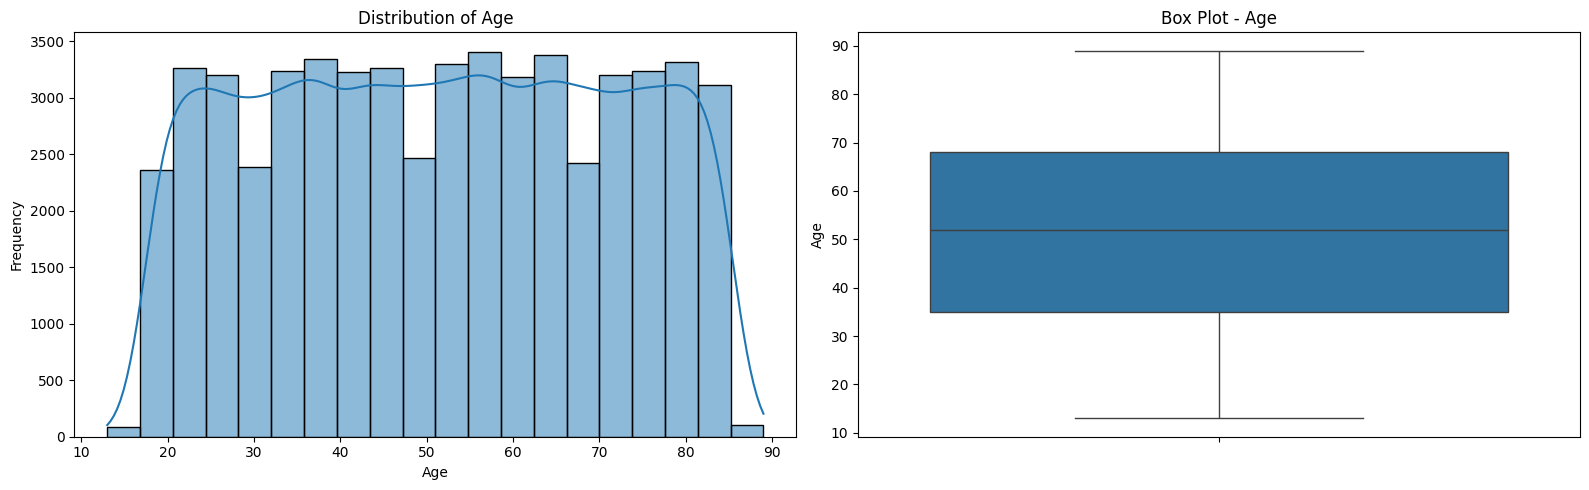

In [5]:
# Define numerical columns
numerical_cols = ['Age']

# Calculate descriptive statistics for numerical columns
if all(col in df.columns for col in numerical_cols):
    numerical_stats = df[numerical_cols].describe()
    analysis_results['numerical_column_analysis']['summary_statistics'] = numerical_stats
    print("Descriptive statistics for numerical variables:")
    display(numerical_stats)
else:
    print(f"One or more numerical columns not found in DataFrame. Available columns: {df.columns}")
    analysis_results['numerical_column_analysis']['summary_statistics'] = pd.DataFrame() # Empty DataFrame as placeholder

# Create histograms and box plots for each numerical variable
if numerical_cols and not numerical_stats.empty:
    plt.figure(figsize=(16, 5 * len(numerical_cols))) # Adjusted figure size
    for i, col in enumerate(numerical_cols):
        plt.subplot(len(numerical_cols), 2, i*2 + 1)
        sns.histplot(df[col], kde=True, bins=20)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')

        plt.subplot(len(numerical_cols), 2, i*2 + 2)
        sns.boxplot(y=df[col])
        plt.title(f'Box Plot - {col}')
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()
elif not numerical_cols:
    print("No numerical columns defined for plotting.")
else:
    print("Numerical statistics are empty, skipping plots.")

### 1 - 2.2: Categorical Variables Analysis

In this subsection, I analyze the distributions of key categorical variables in the dataset: Gender, Blood Type, Medical Condition, Admission Type, Test Results, and Medication. These distributions provide valuable insights into:

- Patient demographics (Gender, Blood Type)
- Disease prevalence (Medical Condition)
- Hospital utilization patterns (Admission Type)
- Clinical outcomes (Test Results)
- Treatment approaches (Medication)

These insights help understand the characteristics of the patient population and can inform healthcare policy, resource planning, and quality improvement initiatives.


Gender - Frequency Distribution:
Number of unique Gender values: 2


,Count,Percentage (%)
Gender,,
Male,27774,50.04
Female,27726,49.96



Blood Type - Frequency Distribution:
Number of unique Blood Type values: 8


,Count,Percentage (%)
Blood Type,,
A-,6969,12.56
A+,6956,12.53
AB+,6947,12.52
AB-,6945,12.51
B+,6945,12.51
B-,6944,12.51
O+,6917,12.46
O-,6877,12.39



Medical Condition - Frequency Distribution:
Number of unique Medical Condition values: 6


,Count,Percentage (%)
Medical Condition,,
Arthritis,9308,16.77
Diabetes,9304,16.76
Hypertension,9245,16.66
Obesity,9231,16.63
Cancer,9227,16.63
Asthma,9185,16.55



Admission Type - Frequency Distribution:
Number of unique Admission Type values: 3


,Count,Percentage (%)
Admission Type,,
Elective,18655,33.61
Urgent,18576,33.47
Emergency,18269,32.92



Test Results - Frequency Distribution:
Number of unique Test Results values: 3


,Count,Percentage (%)
Test Results,,
Abnormal,18627,33.56
Normal,18517,33.36
Inconclusive,18356,33.07



Medication - Frequency Distribution:
Number of unique Medication values: 5


,Count,Percentage (%)
Medication,,
Lipitor,11140,20.07
Ibuprofen,11127,20.05
Aspirin,11094,19.99
Paracetamol,11071,19.95
Penicillin,11068,19.94


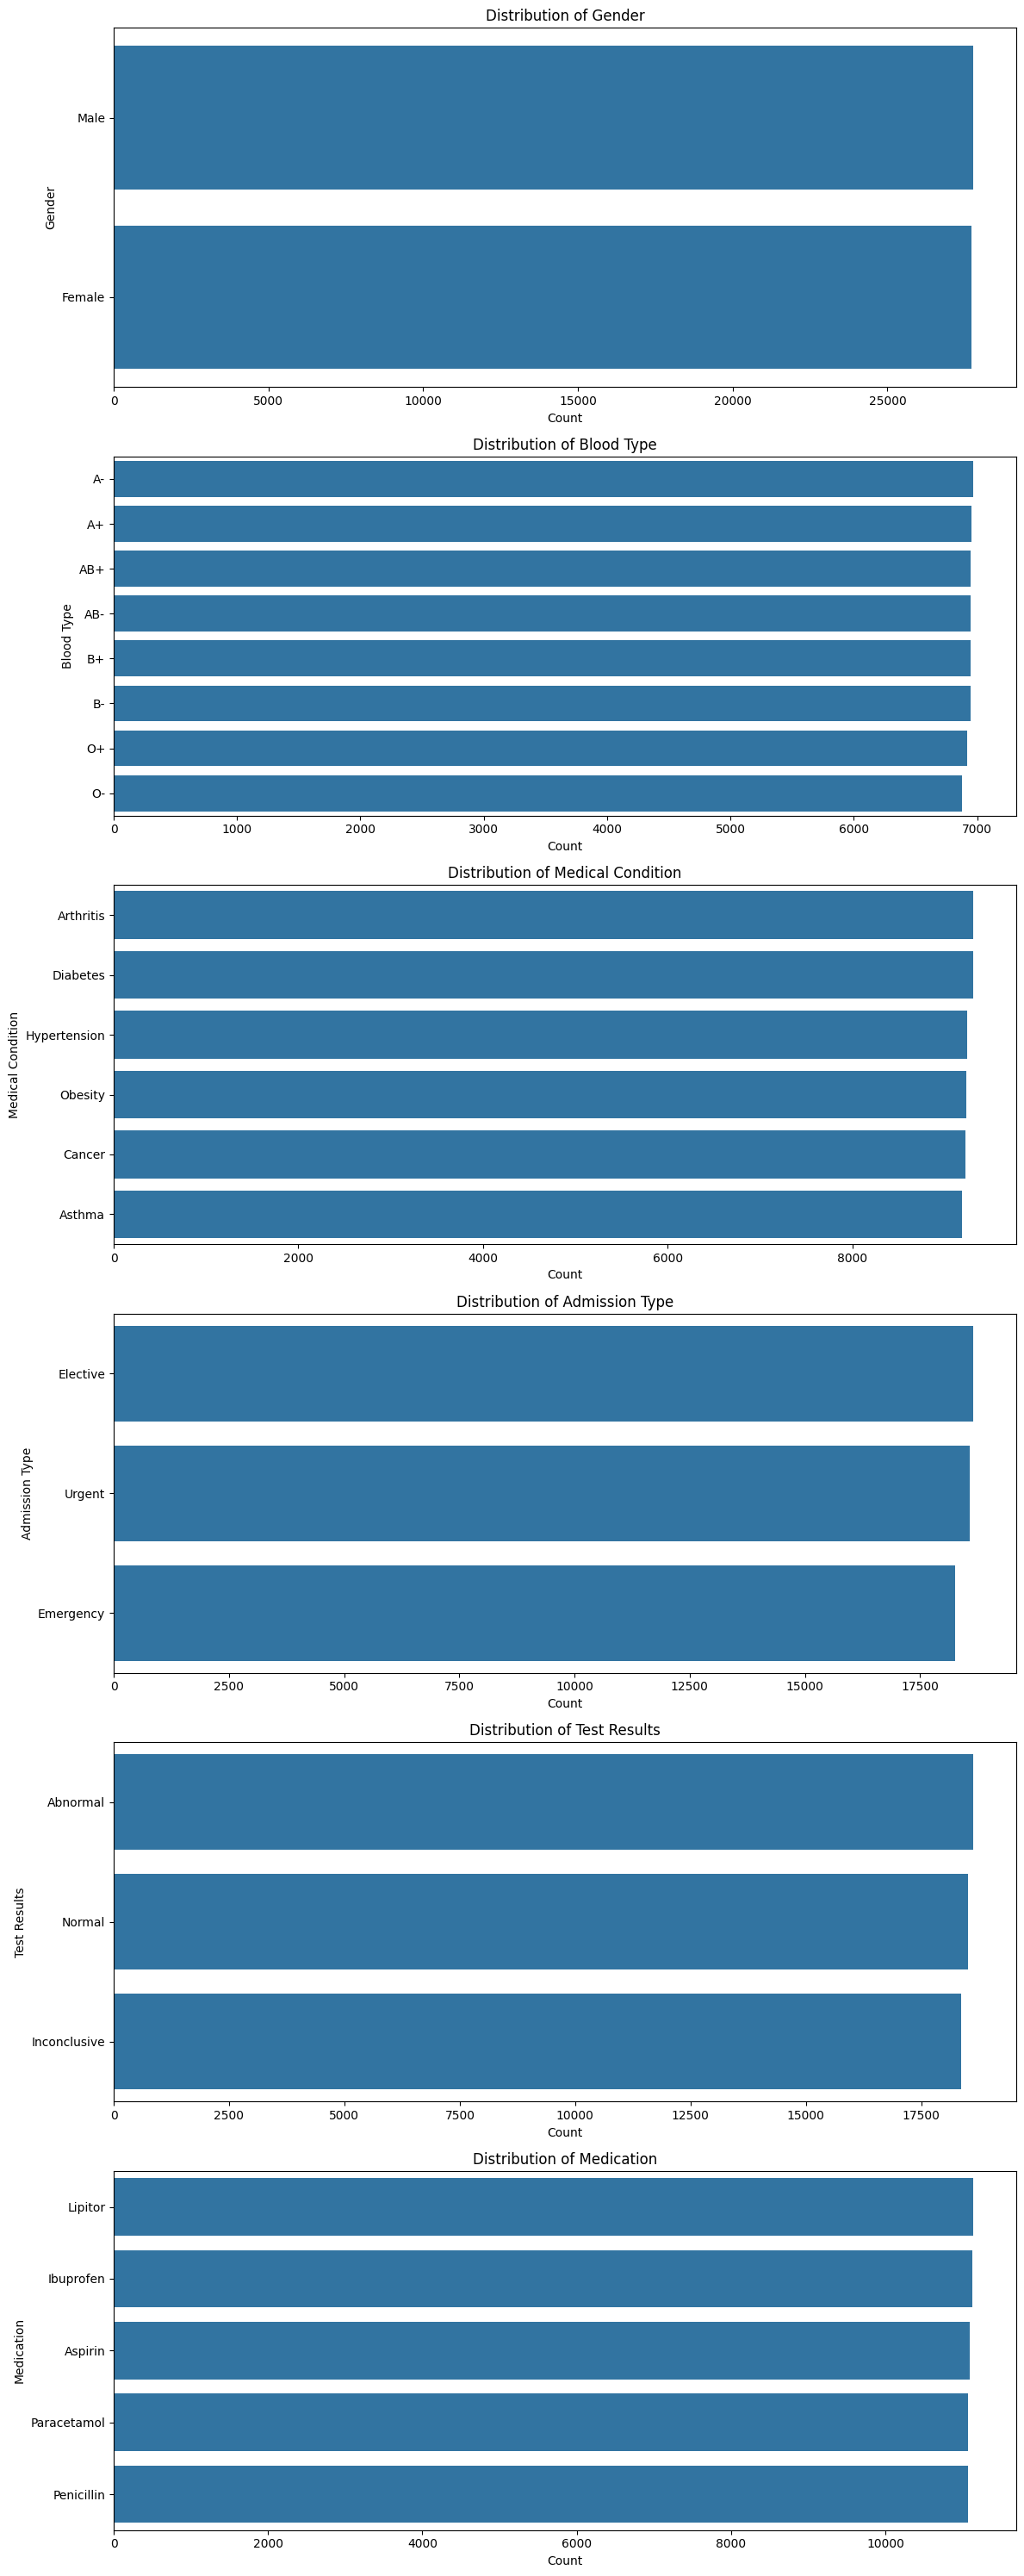

In [6]:
# Define categorical columns
categorical_cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Test Results', 'Medication']

def analyze_categorical(df, column):
    freq_counts = df[column].value_counts()
    freq_percentages = df[column].value_counts(normalize=True) * 100
    freq_table = pd.DataFrame({
        'Count': freq_counts,
        'Percentage (%)': freq_percentages.round(2)
    })
    return freq_table

plt.figure(figsize=(12, len(categorical_cols) * 5)) # Adjust figure size dynamically
for i, col in enumerate(categorical_cols):
    print(f"\n{col} - Frequency Distribution:")
    freq_table = analyze_categorical(df, col)
    unique_count = df[col].nunique()
    analysis_results['categorical_column_analysis'][col] = {
        'frequency_table': freq_table,
        'unique_count': unique_count
    }
    print(f"Number of unique {col} values: {unique_count}")
    display(freq_table)
    
    # Visualize the distribution
    plt.subplot(len(categorical_cols), 1, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

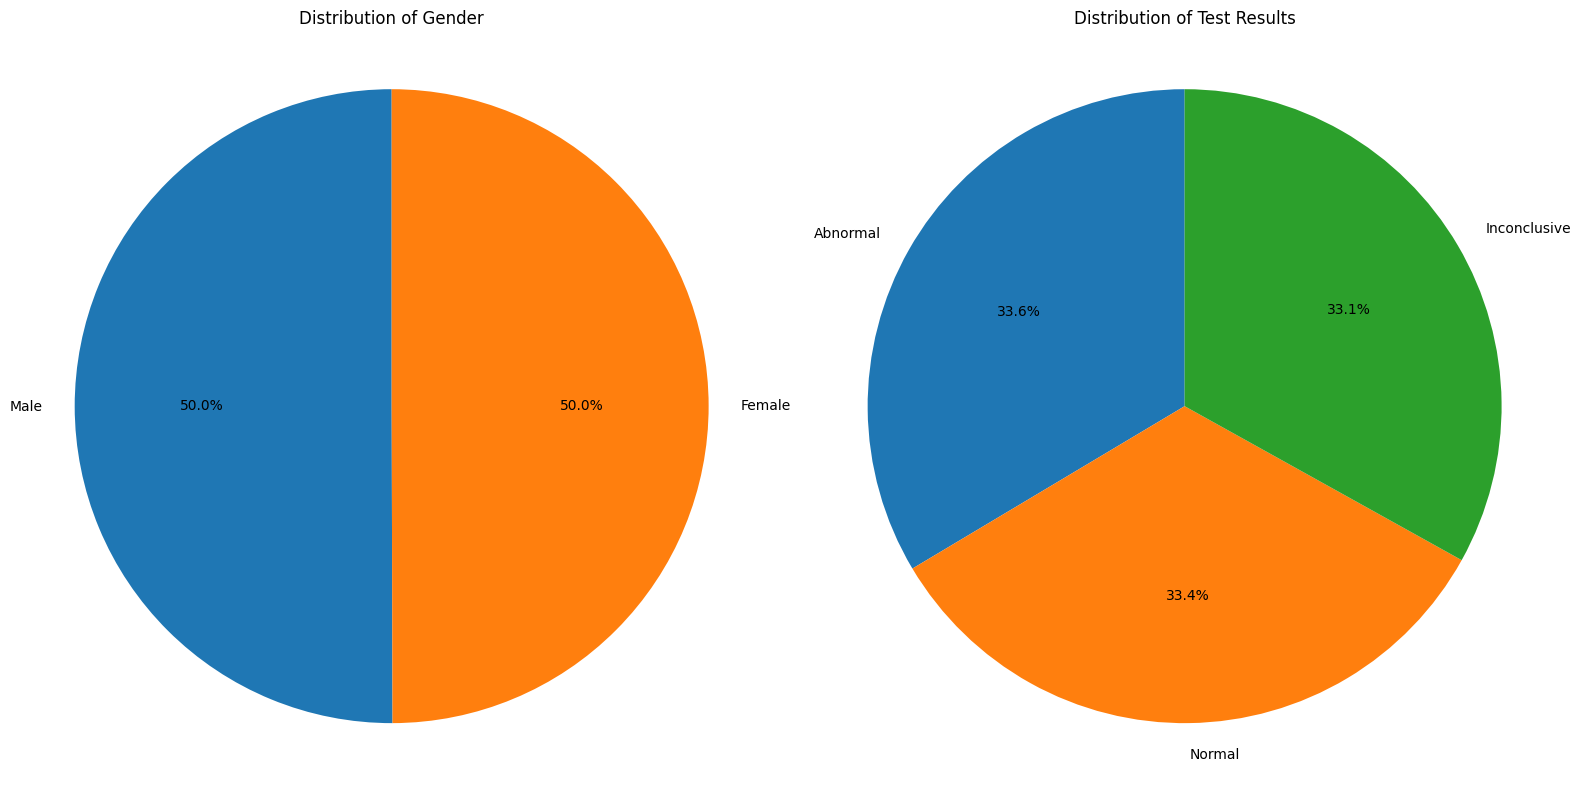

In [7]:
# Create pie charts for categorical variables with few unique values
pie_chart_cols = ['Gender', 'Test Results']
plt.figure(figsize=(16, 8))
for i, col in enumerate(pie_chart_cols):
    plt.subplot(1, len(pie_chart_cols), i + 1)
    freq_counts = df[col].value_counts()
    plt.pie(freq_counts, labels=freq_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Distribution of {col}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

### 1 - 2.3: Date Fields Analysis

In this subsection, I analyze temporal patterns in the healthcare dataset by examining admission dates, discharge dates, and length of stay. This analysis reveals:

- Typical length of hospitalization for different conditions
- Seasonal variations in hospital admissions
- Year-over-year trends in healthcare utilization
- Potential impacts of external events (such as disease outbreaks)

These temporal patterns provide insights into healthcare delivery patterns, capacity planning needs, and can help identify trends that may require attention from healthcare administrators and policymakers.


Length of Stay statistics (days):
count    55500.000000
mean        15.509009
std          8.659600
min          1.000000
25%          8.000000
50%         15.000000
75%         23.000000
max         30.000000
Name: Length of Stay, dtype: float64


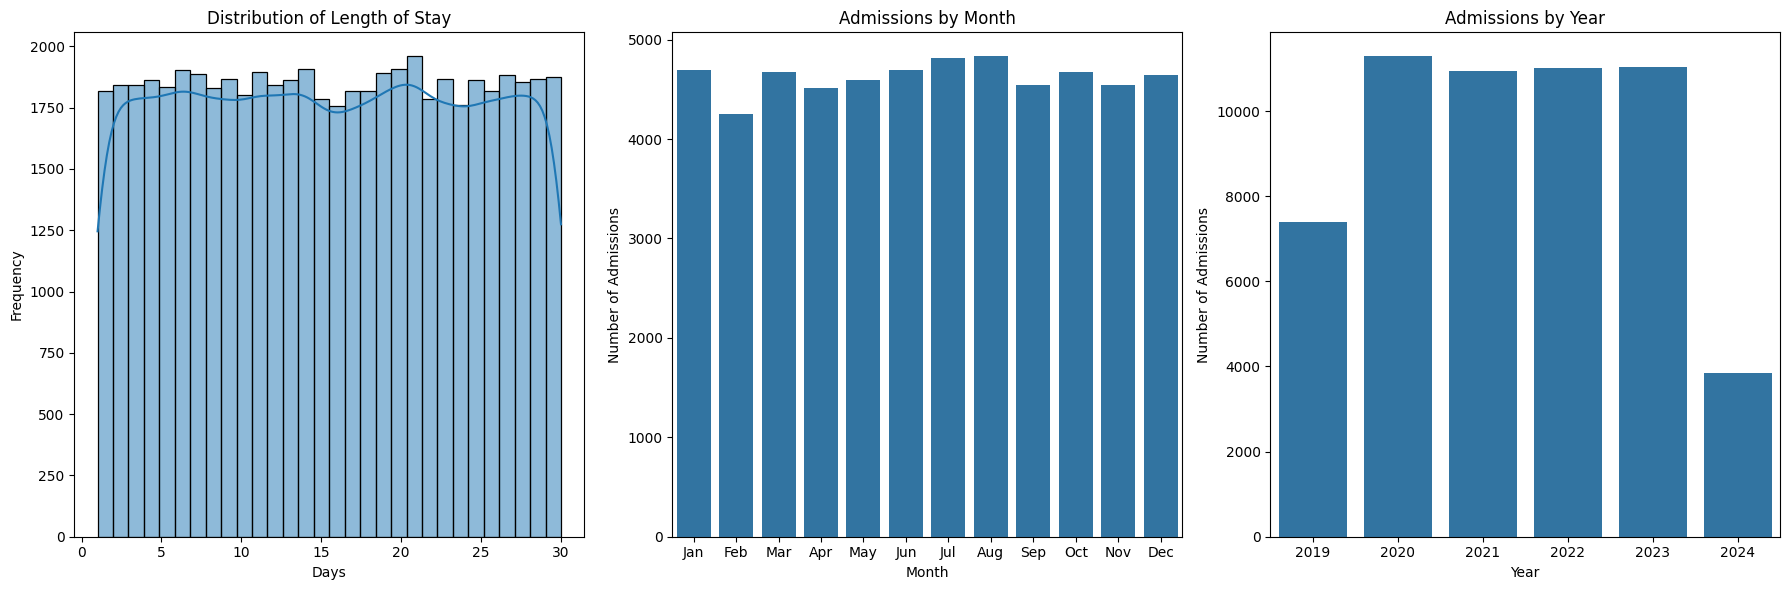

In [8]:
# Analyze length of stay
print("\nLength of Stay statistics (days):")
los_stats = df['Length of Stay'].describe()
analysis_results['date_field_analysis']['length_of_stay_statistics'] = los_stats
print(los_stats)

df['Admission Month'] = df['Date of Admission'].dt.month
df['Admission Year'] = df['Date of Admission'].dt.year

month_counts = df['Admission Month'].value_counts().sort_index()
analysis_results['date_field_analysis']['admission_month_distribution'] = month_counts
year_counts = df['Admission Year'].value_counts().sort_index()
analysis_results['date_field_analysis']['admission_year_distribution'] = year_counts

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(df['Length of Stay'], kde=True, bins=30)
plt.title('Distribution of Length of Stay')
plt.xlabel('Days')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Admissions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.subplot(1, 3, 3)
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title('Admissions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')

plt.tight_layout()
plt.show()

### 1 - 2.4: Relationships Between Variables

In this subsection, I explore key relationships between different variables through visualizations and cross-tabulations. These analyses help understand important clinical associations such as:

- How medical conditions affect length of hospital stay
- Relationships between patient demographics and health outcomes
- Patterns between diagnoses and test results

Identifying these relationships provides valuable insights into clinical patterns that can inform treatment protocols, resource allocation, and quality improvement initiatives in healthcare settings.

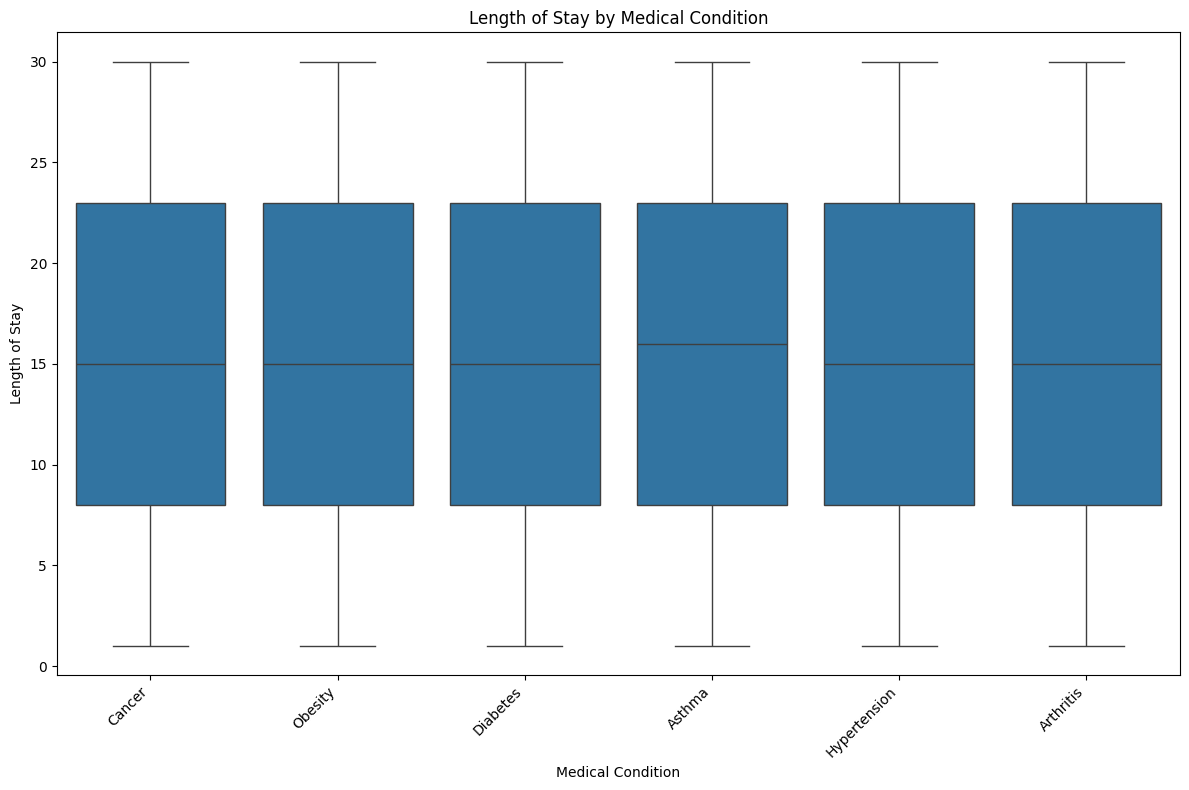

In [9]:
# Box plots to show relationship between categorical and numerical variables
plt.figure(figsize=(12, 8)) # Adjusted figure size as one plot is removed

# Length of Stay by Medical Condition
analysis_results['inter_variable_relationships']['length_of_stay_vs_medical_condition_stats'] = df.groupby('Medical Condition')['Length of Stay'].describe()
# plt.subplot(1, 2, 2) # Adjust subplot index if it's the only plot or first of two
sns.boxplot(x='Medical Condition', y='Length of Stay', data=df) # This can be plt.subplot(1,1,1) if it's the only plot
plt.title('Length of Stay by Medical Condition')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

Medical Condition vs. Test Results (Percentage):


Test Results,Abnormal,Inconclusive,Normal
Medical Condition,,,
Arthritis,34.25,33.18,32.57
Asthma,32.76,32.98,34.26
Cancer,33.79,33.16,33.04
Diabetes,34.05,32.74,33.21
Hypertension,32.58,33.43,33.99
Obesity,33.93,32.95,33.12


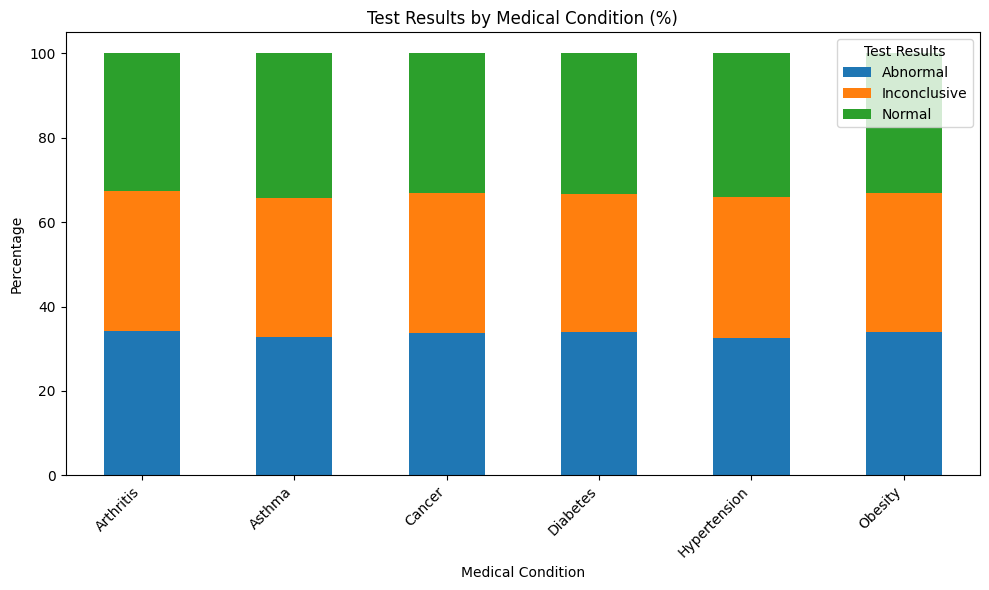

In [10]:
# Contingency tables for categorical relationships

# Medical Condition vs. Test Results
condition_test_results = pd.crosstab(df['Medical Condition'], df['Test Results'], normalize='index') * 100
analysis_results['inter_variable_relationships']['medical_condition_vs_test_results_crosstab'] = condition_test_results
print("Medical Condition vs. Test Results (Percentage):")
display(condition_test_results.round(2))

# Visualize the relationship
plt.figure(figsize=(10, 6)) # Reduced figure size
condition_test_results.plot(kind='bar', stacked=True, ax=plt.gca()) # Use current axes
plt.title('Test Results by Medical Condition (%)')
plt.xlabel('Medical Condition')
plt.ylabel('Percentage')
plt.legend(title='Test Results')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

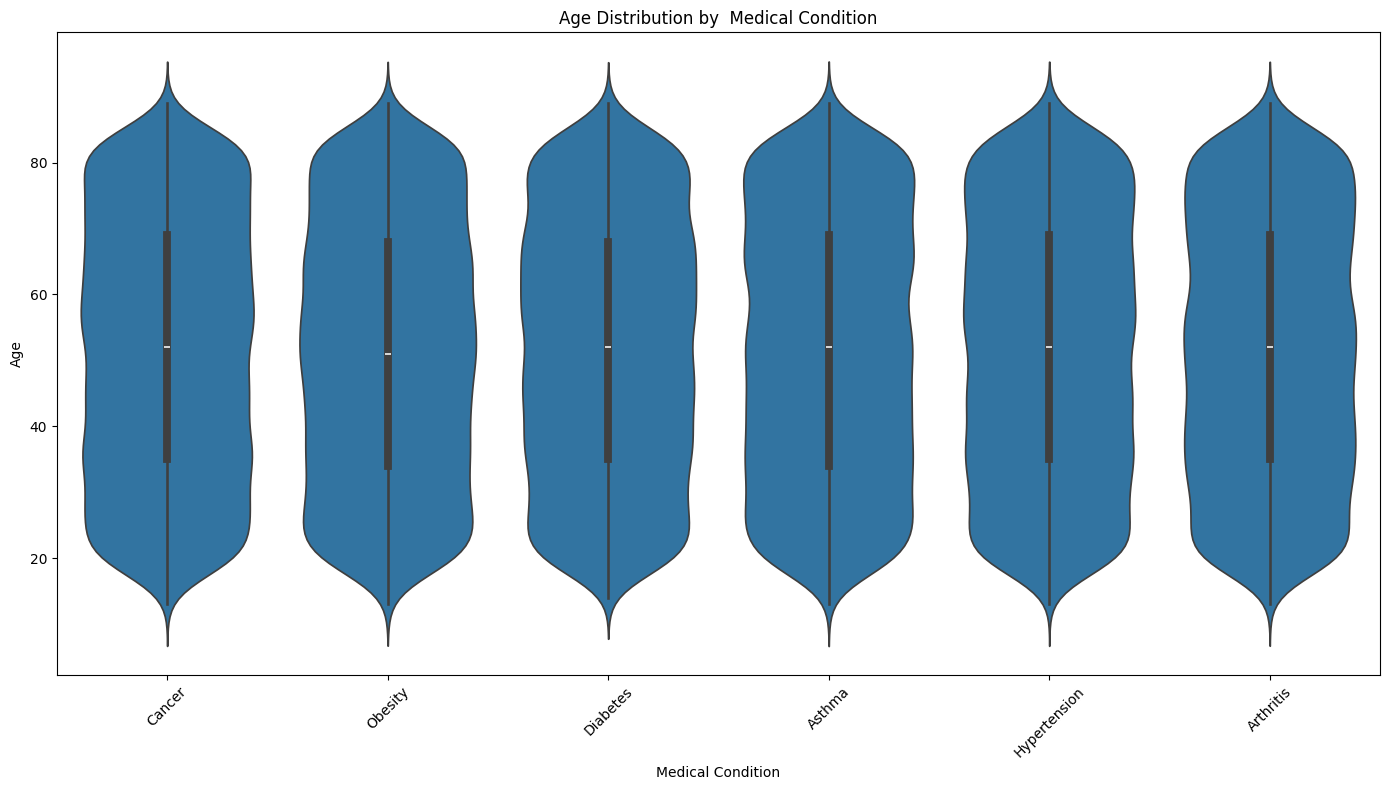

In [11]:
# Age distribution by Medical Condition
analysis_results['inter_variable_relationships']['age_distribution_vs_medical_condition_stats'] = df.groupby('Medical Condition')['Age'].describe()
plt.figure(figsize=(14, 8))
sns.violinplot(x='Medical Condition', y='Age', data=df)
plt.title('Age Distribution by  Medical Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1 - 2.5: Key Conditional Probabilities

In this subsection, I calculate and visualize important conditional probabilities that provide clinical insights, such as:

- Probability of abnormal test results given a specific medical condition
- Likelihood of emergency admission for different conditions

These probability calculations help quantify the relationships between conditions, treatments, and outcomes. Understanding these probabilities is valuable for clinical decision support, risk assessment, and can help healthcare providers better understand the likelihood of various clinical scenarios.

Probability of Abnormal Test Results by Medical Condition:


,Probability (%)
Arthritis,34.250107
Diabetes,34.049871
Obesity,33.929152
Cancer,33.792132
Asthma,32.759935
Hypertension,32.579773


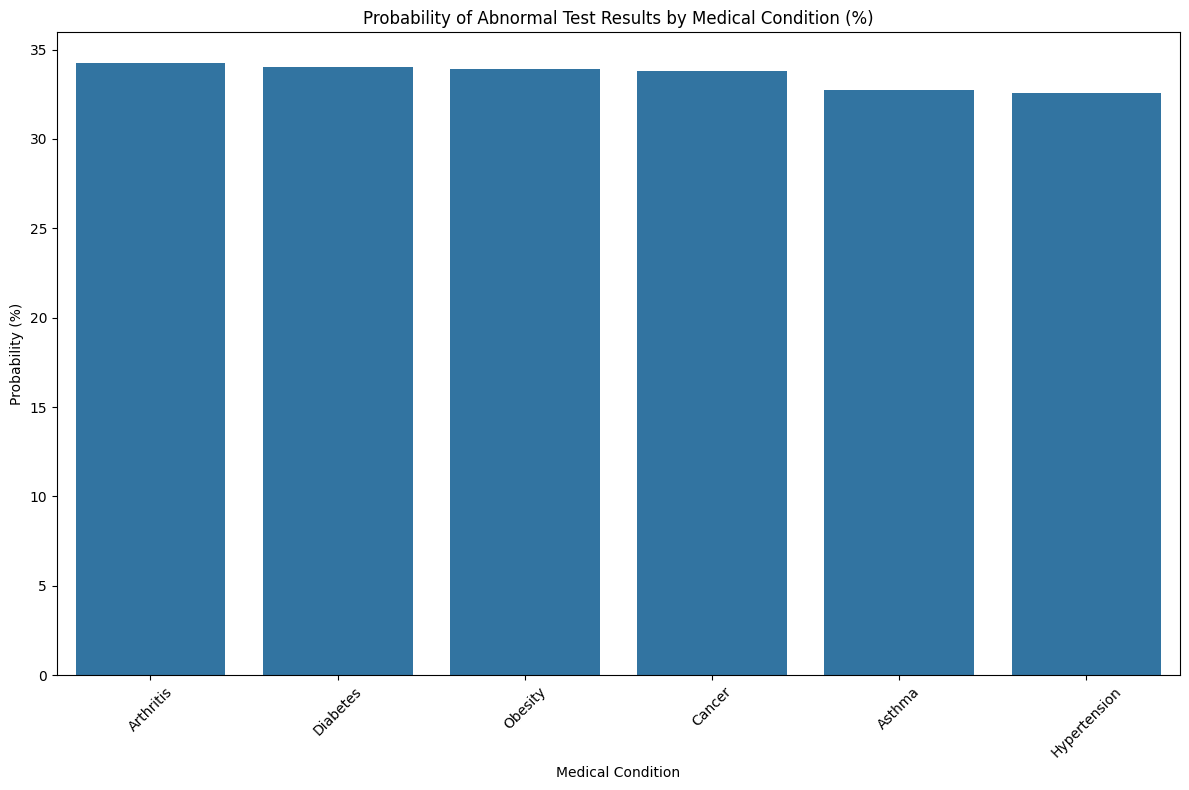


Probability of Emergency Admission by Medical Condition:


,Probability (%)
Obesity,33.864153
Arthritis,33.390632
Asthma,32.683723
Cancer,32.675843
Hypertension,32.460790
Diabetes,32.426913


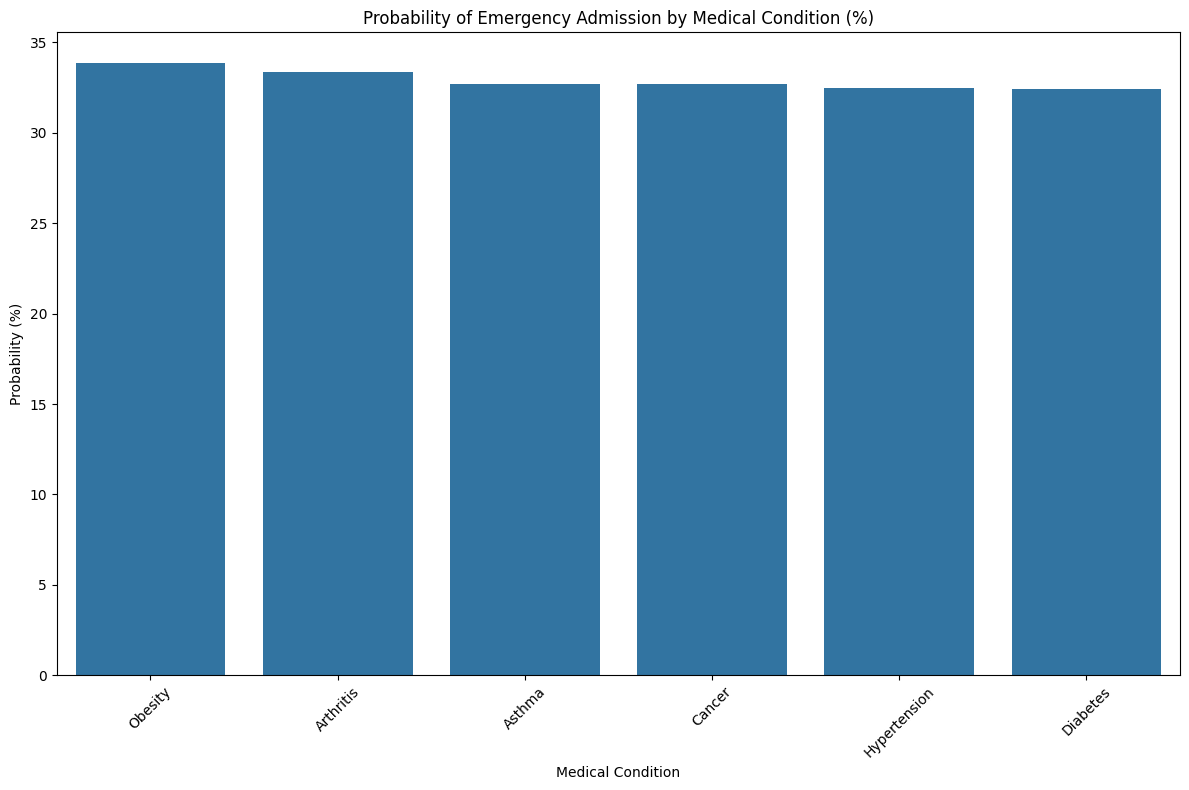

In [12]:
# Probability of Abnormal Test Results given Medical Condition
abnormal_by_condition = {}
for condition in df['Medical Condition'].unique():
    condition_data = df[df['Medical Condition'] == condition]
    abnormal_prob = (condition_data['Test Results'] == 'Abnormal').mean() * 100
    abnormal_by_condition[condition] = abnormal_prob

abnormal_prob_df = pd.DataFrame.from_dict(abnormal_by_condition, orient='index', columns=['Probability (%)']).sort_values('Probability (%)', ascending=False)
analysis_results['key_conditional_probabilities']['abnormal_test_results_given_medical_condition'] = abnormal_prob_df
print("Probability of Abnormal Test Results by Medical Condition:")
display(abnormal_prob_df)

# Visualize
plt.figure(figsize=(12, 8))
sns.barplot(x=abnormal_prob_df.index, y='Probability (%)', data=abnormal_prob_df)
plt.title('Probability of Abnormal Test Results by Medical Condition (%)')
plt.xlabel('Medical Condition')
plt.ylabel('Probability (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Emergency Admission Probability by Medical Condition
emergency_by_condition = {}
for condition in df['Medical Condition'].unique():
    condition_data = df[df['Medical Condition'] == condition]
    emergency_prob = (condition_data['Admission Type'] == 'Emergency').mean() * 100
    emergency_by_condition[condition] = emergency_prob

emergency_prob_df = pd.DataFrame.from_dict(emergency_by_condition, orient='index', columns=['Probability (%)']).sort_values('Probability (%)', ascending=False)
analysis_results['key_conditional_probabilities']['emergency_admission_given_medical_condition'] = emergency_prob_df
print("\nProbability of Emergency Admission by Medical Condition:")
display(emergency_prob_df)

# Visualize
plt.figure(figsize=(12, 8))
sns.barplot(x=emergency_prob_df.index, y='Probability (%)', data=emergency_prob_df)
plt.title('Probability of Emergency Admission by Medical Condition (%)')
plt.xlabel('Medical Condition')
plt.ylabel('Probability (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1 - 2.6: Healthcare Provider Analysis

In this subsection, I analyze the distribution of healthcare providers in the dataset, focusing on:

- Hospitals: Frequency and distribution of care facilities
- Doctors: Provider patterns and potential specializations
- Insurance Providers: Coverage patterns across the patient population

While this dataset is synthetic and may not show meaningful patterns in these fields, in real-world healthcare data, this analysis would reveal important insights about provider networks, specialist accessibility, insurance coverage patterns, and healthcare system utilization that can inform healthcare policy and planning decisions.

In [13]:
# Count unique doctors and hospitals
unique_doctors = df['Doctor'].nunique()
unique_hospitals = df['Hospital'].nunique()
unique_insurance = df['Insurance Provider'].nunique()

print(f"Number of unique doctors in the dataset: {unique_doctors}")
print(f"Number of unique hospitals in the dataset: {unique_hospitals}")
print(f"Number of unique insurance providers in the dataset: {unique_insurance}")

# Record these counts in analysis_results
if 'provider_summary' not in analysis_results:
    analysis_results['provider_summary'] = {}

analysis_results['provider_summary']['unique_doctor_count'] = unique_doctors
analysis_results['provider_summary']['unique_hospital_count'] = unique_hospitals
analysis_results['provider_summary']['unique_insurance_count'] = unique_insurance

# Show the top 10 most frequent doctors, hospitals and insurance providers
top_doctors = df['Doctor'].value_counts().head(10)
top_hospitals = df['Hospital'].value_counts().head(10)
top_insurance_providers = df['Insurance Provider'].value_counts().head(10)

print("\nTop 10 most frequent doctors:")
display(top_doctors)

print("\nTop 10 most frequent hospitals:")
display(top_hospitals)

print("\nTop 10 most frequent insurance providers:")
display(top_insurance_providers)

# Record these in analysis_results as well
analysis_results['provider_summary']['top_doctors'] = top_doctors
analysis_results['provider_summary']['top_hospitals'] = top_hospitals
analysis_results['provider_summary']['top_insurance_providers'] = top_insurance_providers

Number of unique doctors in the dataset: 40341
Number of unique hospitals in the dataset: 39876
Number of unique insurance providers in the dataset: 5

Top 10 most frequent doctors:


Doctor
Michael Smith       27
John Smith          22
Robert Smith        22
James Smith         20
Michael Johnson     20
David Smith         19
Robert Johnson      19
Michael Williams    18
John Johnson        17
Matthew Smith       17
Name: count, dtype: int64


Top 10 most frequent hospitals:


Hospital
LLC Smith      44
Ltd Smith      39
Johnson PLC    38
Smith Ltd      37
Smith PLC      36
Smith Group    36
Johnson Inc    35
Smith Inc      34
Group Smith    32
Smith LLC      32
Name: count, dtype: int64


Top 10 most frequent insurance providers:


Insurance Provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64

### 1 - 2.7: Comprehensive Correlation Analysis

In this subsection, I perform a detailed correlation analysis between all variables in the dataset using appropriate statistical measures:

- **Pearson correlation** for numerical variables
- **Correlation ratio (eta)** between categorical and numerical variables
- **Cramer's V** for relationships between categorical variables

The analysis reveals relatively weak correlations in this synthetic dataset. In real-world healthcare data, we would typically expect to see stronger correlations, such as between medical conditions and prescribed medications, age and certain diagnoses, or length of stay and admission type.

These correlation analyses help identify important relationships between variables that can inform clinical understanding, quality improvement initiatives, and healthcare research priorities.

Correlation Matrix for Numerical Variables:


,Age,Length of Stay
Age,1.00000,0.00822
Length of Stay,0.00822,1.00000


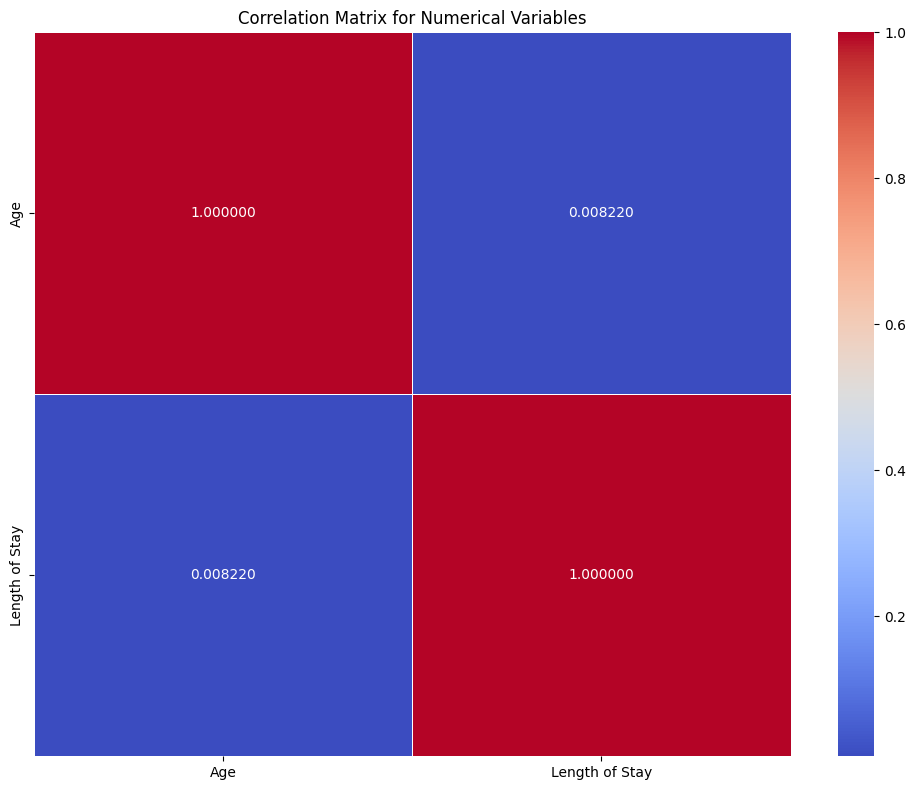


Correlation Ratio (Eta) between Categorical and Numerical Variables:


,Age,Length of Stay,Admission Month,Admission Year
Gender,0.002,0.004,0.003,0.001
Blood Type,0.008,0.015,0.009,0.005
Medical Condition,0.008,0.010,0.013,0.010
Admission Type,0.005,0.009,0.007,0.005
Test Results,0.008,0.004,0.002,0.003
Medication,0.010,0.004,0.012,0.012
Insurance Provider,0.006,0.008,0.006,0.004


DataFrame dtype: float64

Cramer's V between Categorical Variables:


,Gender,Blood Type,Medical Condition,Admission Type,Test Results,Medication,Insurance Provider
Gender,1.000000,0.011405,0.000000,0.012024,0.000574,0.006455,0.000000
Blood Type,0.011405,1.000000,0.000000,0.000000,0.000000,0.000000,0.005280
Medical Condition,0.000000,0.000000,1.000000,0.009172,0.005415,0.001645,0.000000
Admission Type,0.012024,0.000000,0.009172,1.000000,0.000000,0.000000,0.010248
Test Results,0.000574,0.000000,0.005415,0.000000,1.000000,0.000000,0.001844
Medication,0.006455,0.000000,0.001645,0.000000,0.000000,1.000000,0.000000
Insurance Provider,0.000000,0.005280,0.000000,0.010248,0.001844,0.000000,1.000000


DataFrame dtype: float64


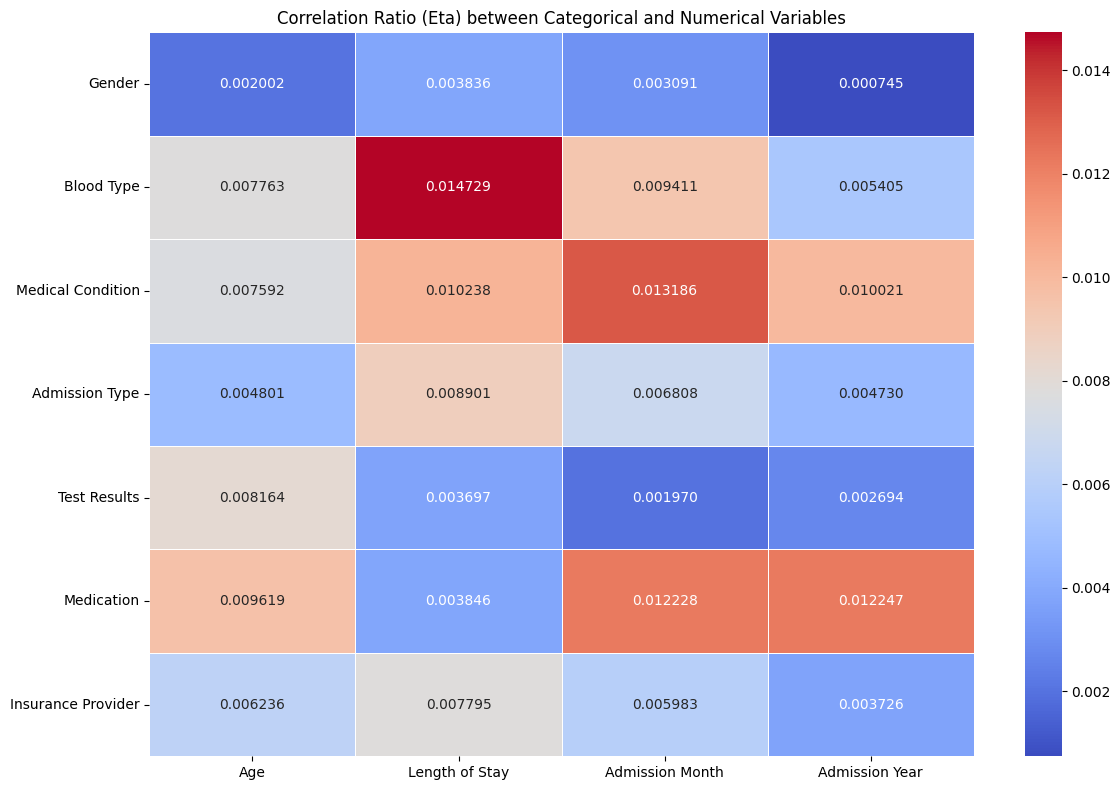

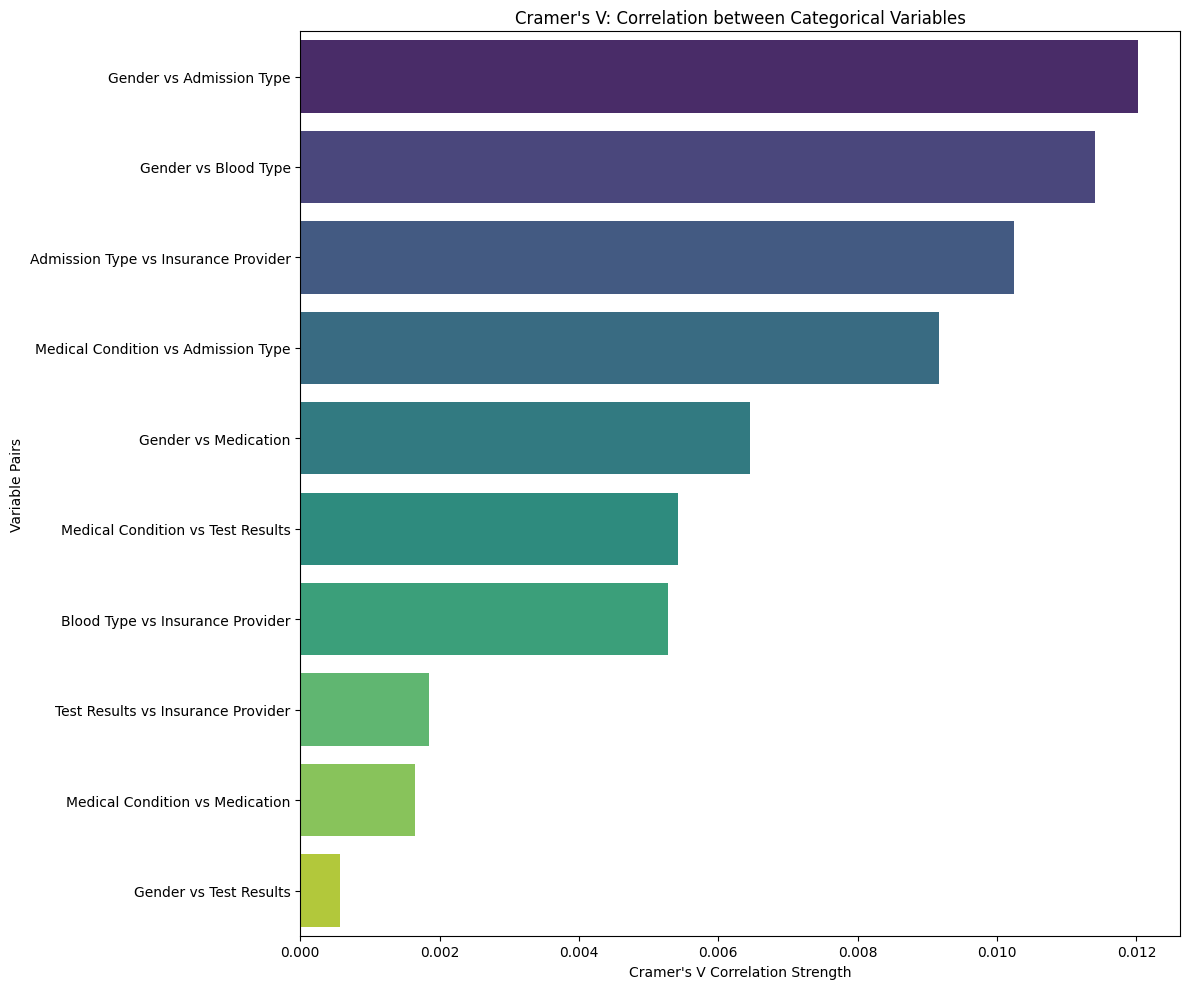


Table of Categorical Correlations (Cramer's V > 0):


,Pair,Correlation
0,Gender vs Admission Type,0.012024
1,Gender vs Blood Type,0.011405
2,Admission Type vs Insurance Provider,0.010248
3,Medical Condition vs Admission Type,0.009172
4,Gender vs Medication,0.006455
5,Medical Condition vs Test Results,0.005415
6,Blood Type vs Insurance Provider,0.005280
7,Test Results vs Insurance Provider,0.001844
8,Medical Condition vs Medication,0.001645
9,Gender vs Test Results,0.000574



Top 10 Categorical-Numerical Relationships (by correlation strength):


,Categorical Variable,Numerical Variable,Correlation Ratio
0,Length of Stay,Blood Type,0.014729
1,Admission Month,Medical Condition,0.013186
2,Admission Year,Medication,0.012247
3,Admission Month,Medication,0.012228
4,Length of Stay,Medical Condition,0.010238
5,Admission Year,Medical Condition,0.010021
6,Age,Medication,0.009619
7,Admission Month,Blood Type,0.009411
8,Length of Stay,Admission Type,0.008901
9,Age,Test Results,0.008164



Top 10 Categorical-Categorical Relationships (by correlation strength):


,Variable 1,Variable 2,Cramer's V
0,Gender,Admission Type,0.012024
1,Admission Type,Gender,0.012024
2,Blood Type,Gender,0.011405
3,Gender,Blood Type,0.011405
4,Admission Type,Insurance Provider,0.010248
5,Insurance Provider,Admission Type,0.010248
6,Medical Condition,Admission Type,0.009172
7,Admission Type,Medical Condition,0.009172
8,Medication,Gender,0.006455
9,Gender,Medication,0.006455


In [14]:
# 1. First calculate numerical correlations using Pearson correlation
# Correlation matrix for numerical variables
numerical_vars = ['Age', 'Length of Stay']
correlation_matrix = df[numerical_vars].corr()
analysis_results['inter_variable_relationships']['numerical_correlation_matrix'] = correlation_matrix

print("Correlation Matrix for Numerical Variables:")
display(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.6f', linewidths=.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.tight_layout()
plt.show()

# 2. Now expand this to include correlations between all variables, including categorical

# Define categorical columns for correlation analysis
cat_columns = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Test Results',
               'Medication', 'Insurance Provider']

# Define numerical columns for correlation analysis
num_columns = ['Age', 'Length of Stay', 'Admission Month', 'Admission Year']

# Categorical to numerical correlations using correlation ratio (eta coefficient)
# Correlation ratio measures the relationship between categorical and numerical variables
def correlation_ratio(categories, values):
    """Calculate the correlation ratio (eta) between a categorical and numerical variable"""
    categories = pd.Series(categories)
    values = pd.Series(values)
    
    # Fix: Use a more robust approach that doesn't rely on consecutive indices
    categories = categories.astype('category')
    cat_codes = categories.cat.codes
    unique_codes = np.unique(cat_codes)
    
    # Calculate overall mean of values
    y_total_avg = values.mean()
    
    # Initialize arrays for category means and counts
    category_means = np.zeros(len(unique_codes))
    category_counts = np.zeros(len(unique_codes))
    
    # Calculate mean for each category
    for i, code in enumerate(unique_codes):
        mask = cat_codes == code
        cat_values = values[mask]
        category_counts[i] = len(cat_values)
        category_means[i] = cat_values.mean() if len(cat_values) > 0 else 0
    
    # Calculate numerator (between-category variance)
    numerator = np.sum(category_counts * np.square(category_means - y_total_avg))
    
    # Calculate denominator (total variance)
    denominator = np.sum(np.square(values - y_total_avg))
    
    # Avoid division by zero
    if denominator == 0:
        return 0
        
    # Return the correlation ratio
    return np.sqrt(numerator / denominator)

# Create a DataFrame of float64 type explicitly to store correlations
cat_num_corr = pd.DataFrame(index=cat_columns, columns=num_columns, dtype=np.float64)

# Calculate correlation ratio for each categorical-numerical pair
for cat in cat_columns:
    for num in num_columns:
        # Convert the result to float to avoid any type issues
        cat_num_corr.loc[cat, num] = float(correlation_ratio(df[cat], df[num]))

print("\nCorrelation Ratio (Eta) between Categorical and Numerical Variables:")
display(cat_num_corr.round(3))
print(f"DataFrame dtype: {cat_num_corr.dtypes[0]}")

# 3. Categorical to categorical correlations using Cramer's V
def cramers_v(x, y):
    """Calculate Cramer's V statistic for categorical-categorical association"""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Create a DataFrame explicitly with float64 type
cat_cat_corr = pd.DataFrame(index=cat_columns, columns=cat_columns, dtype=np.float64)

# Calculate Cramer's V for each categorical-categorical pair
for i, cat1 in enumerate(cat_columns):
    for j, cat2 in enumerate(cat_columns):
        if i == j:
            cat_cat_corr.loc[cat1, cat2] = 1.0  # Perfect correlation with itself
        elif j > i:  # Only calculate for upper triangle to avoid duplicate calculations
            try:
                # Explicitly convert to float
                cat_cat_corr.loc[cat1, cat2] = float(cramers_v(df[cat1], df[cat2]))
                cat_cat_corr.loc[cat2, cat1] = cat_cat_corr.loc[cat1, cat2]  # Symmetry
            except ValueError:
                # Handle rare cases where cramers_v calculation might fail
                cat_cat_corr.loc[cat1, cat2] = np.nan
                cat_cat_corr.loc[cat2, cat1] = np.nan

print("\nCramer's V between Categorical Variables:")
display(cat_cat_corr)
print(f"DataFrame dtype: {cat_cat_corr.dtypes[0]}")

# 4. Visualize the correlation matrices

# Create heatmap for categorical-numerical correlations
plt.figure(figsize=(12, 8))
sns.heatmap(cat_num_corr, annot=True, cmap='coolwarm', fmt='.6f', linewidths=.5)
plt.title('Correlation Ratio (Eta) between Categorical and Numerical Variables')
plt.tight_layout()
plt.show()

# Create a cleaner visualization of categorical correlations without matrix format
plt.figure(figsize=(12, 10))

# Extract all pairwise correlations
correlations = []
labels = []

# Get all unique variable pairs and their correlations
for i, cat1 in enumerate(cat_columns):
    for j, cat2 in enumerate(cat_columns):
        if i < j:  # Only consider unique pairs (avoiding duplicates and self-pairs)
            corr_value = cat_cat_corr.loc[cat1, cat2]
            if corr_value > 0:  # Only include positive correlations
                correlations.append(corr_value)
                labels.append(f"{cat1} vs {cat2}")

# Create a DataFrame for easier sorting and plotting
corr_df = pd.DataFrame({
    'Pair': labels,
    'Correlation': correlations
})

# Sort by correlation strength
corr_df = corr_df.sort_values('Correlation', ascending=False)

# Create a horizontal bar chart (only if I have data to plot)
if len(corr_df) > 0:
    sns.barplot(x='Correlation', y='Pair', data=corr_df, palette='viridis')
    plt.title("Cramer's V: Correlation between Categorical Variables")
    plt.xlabel("Cramer's V Correlation Strength")
    plt.ylabel("Variable Pairs")
    plt.xlim(0, corr_df['Correlation'].max() * 1.05)  # Add a bit of padding
    plt.tight_layout()
    plt.show()
else:
    print("No positive correlations found between categorical variables.")

# Display the table of correlations (only positive ones)
print("\nTable of Categorical Correlations (Cramer's V > 0):")
display(corr_df.reset_index(drop=True))

# 5. Identify the strongest relationships
print("\nTop 10 Categorical-Numerical Relationships (by correlation strength):")
cat_num_flat = cat_num_corr.unstack().sort_values(ascending=False)
top_cat_num = cat_num_flat.head(10).reset_index().rename(columns={'level_0': 'Categorical Variable', 'level_1': 'Numerical Variable', 0: 'Correlation Ratio'})
display(top_cat_num)

print("\nTop 10 Categorical-Categorical Relationships (by correlation strength):")
# Exclude self-correlations (which are always 1)
cat_cat_flat = cat_cat_corr.where(~np.eye(len(cat_columns), dtype=bool)).unstack().sort_values(ascending=False)
cat_cat_flat = cat_cat_flat.dropna()
top_cat_cat = cat_cat_flat.head(10).reset_index().rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: "Cramer's V"})
display(top_cat_cat)

In [15]:
# Function to convert non-serializable objects to JSON-compatible format
def make_json_serializable(obj):
    """
    Convert pandas DataFrames and Series to JSON-compatible dictionaries
    """
    if isinstance(obj, pd.DataFrame):
        return obj.to_dict('records')
    elif isinstance(obj, pd.Series):
        return obj.to_dict()
    elif isinstance(obj, dict):
        return {key: make_json_serializable(value) for key, value in obj.items()}
    elif isinstance(obj, list):
        return [make_json_serializable(item) for item in obj]
    elif isinstance(obj, np.int64):
        return int(obj)
    elif isinstance(obj, np.float64):
        return float(obj)
    elif pd.isna(obj):
        return None
    else:
        return obj

# Convert analysis_results to JSON-compatible format
json_compatible_results = make_json_serializable(analysis_results)

# Save analysis results to JSON file
output_filename = 'healthcare_analysis_results.json'
with open(output_filename, 'w') as f:
    json.dump(json_compatible_results, f, indent=2)

print(f"\nAnalysis results have been saved to '{output_filename}'")
print(f"The JSON file contains {len(json_compatible_results)} main analysis categories:")
for category in json_compatible_results.keys():
    print(f"  - {category}")

# Display a summary of what was saved
print("\nSummary of saved analysis results:")
print(f"- Dataset overview: Shape {json_compatible_results['dataset_overview']['shape']}, {json_compatible_results['dataset_overview']['num_records']} records")
print(f"- Numerical analysis: Summary statistics for {len(json_compatible_results['numerical_column_analysis'])} numerical variables")
print(f"- Categorical analysis: {len(json_compatible_results['categorical_column_analysis'])} categorical variables analyzed")
print(f"- Date field analysis: Temporal patterns and length of stay statistics")
print(f"- Inter-variable relationships: Correlation matrices and cross-tabulations")
print(f"- Conditional probabilities: Key clinical probability calculations")
if 'provider_summary' in json_compatible_results:
    print(f"- Provider summary: {json_compatible_results['provider_summary']['unique_doctor_count']} doctors, {json_compatible_results['provider_summary']['unique_hospital_count']} hospitals, {json_compatible_results['provider_summary']['unique_insurance_count']} insurance providers")


Analysis results have been saved to 'healthcare_analysis_results.json'
The JSON file contains 8 main analysis categories:
  - dataset_overview
  - numerical_column_analysis
  - categorical_column_analysis
  - text_field_analysis
  - date_field_analysis
  - inter_variable_relationships
  - key_conditional_probabilities
  - provider_summary

Summary of saved analysis results:
- Dataset overview: Shape (55500, 15), 55500 records
- Numerical analysis: Summary statistics for 1 numerical variables
- Categorical analysis: 6 categorical variables analyzed
- Date field analysis: Temporal patterns and length of stay statistics
- Inter-variable relationships: Correlation matrices and cross-tabulations
- Conditional probabilities: Key clinical probability calculations
- Provider summary: 40341 doctors, 39876 hospitals, 5 insurance providers


## Analysis Results Export

The comprehensive analysis results have been saved to `healthcare_analysis_results.json`. This JSON file contains all the statistical findings, distributions, correlations, and insights discovered during the analysis.

### JSON File Structure:

1. **dataset_overview**: Basic dataset information (shape, record count)
2. **numerical_column_analysis**: Descriptive statistics for numerical variables
3. **categorical_column_analysis**: Frequency distributions and unique counts for categorical variables
4. **date_field_analysis**: Temporal patterns, length of stay statistics, and admission trends
5. **inter_variable_relationships**: Correlation matrices and cross-tabulations between variables
6. **key_conditional_probabilities**: Clinical probability calculations (abnormal test results, emergency admissions)
7. **provider_summary**: Healthcare provider distribution analysis

This structured JSON output can be easily loaded and used in subsequent analyses, reports, or machine learning pipelines. All pandas DataFrames have been converted to JSON-compatible formats while preserving the analytical insights.